<a href="https://colab.research.google.com/github/Miladpolytechnique/cat-dog/blob/master/cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#%autoreload 2

#%matplotlib inline

In [0]:
import math
import time
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import csv
from tqdm import tqdm
from PIL import Image
from sklearn.metrics import confusion_matrix
from torchsummary import summary
from torch.autograd import Variable

np.set_printoptions(precision=2)
np.random.seed(1234)


In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.utils.data.sampler as sampler

use_gpu = torch.cuda.is_available()

In [0]:
import torchvision
import torchvision.datasets as dataset
import torchvision.models as models
import torchvision.transforms as transforms

In [0]:
from google.colab import drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /drive


In [0]:
# Hyper parameters
Data_DIR = "/drive/My Drive/cat-dog/"
Image_size = 224 # size of each img
batch_size = 256 # 25 ta ax midam vase train

In [0]:
os.listdir(Data_DIR)

['trainset', 'testset']

In [0]:


trn_dir = f'{Data_DIR}trainset'  #make string my train dataset
tst_dir = f'{Data_DIR}testset'   # make string my validation dataset

In [0]:

print(os.listdir(trn_dir))
print(os.listdir(tst_dir))

['Cat', 'Dog', '.DS_Store']
['test']


In [0]:
# use glob library to address my img
trn_fname = glob.glob(f'{trn_dir}/*/*.jpg')  # use glob to see where is my trainset and I mentioned which files I want!!!
trn_fname[:5]

['/drive/My Drive/cat-dog/trainset/Cat/5560.Cat.jpg',
 '/drive/My Drive/cat-dog/trainset/Cat/7407.Cat.jpg',
 '/drive/My Drive/cat-dog/trainset/Cat/9481.Cat.jpg',
 '/drive/My Drive/cat-dog/trainset/Cat/5386.Cat.jpg',
 '/drive/My Drive/cat-dog/trainset/Cat/564.Cat.jpg']

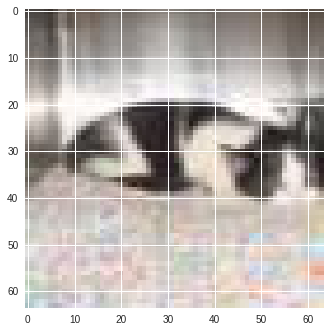

In [0]:
img = plt.imread(trn_fname[1])
plt.imshow(img)

In [0]:
#Data processing
# resize the image to uniqe one and transfor it to tensor
tfms = transforms.Compose([
    transforms.Resize((Image_size, Image_size)), 
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(), # Tensor or matrix
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # RGB ,normlzie all imgs,to use in my mean and sd
])

In [0]:
#Apply transformation
train_ds = dataset.ImageFolder(trn_dir, transform=tfms)
test_ds = dataset.ImageFolder(tst_dir, transform=tfms)
train_ds.class_to_idx

{'Cat': 0, 'Dog': 1}

In [0]:
#Split data into training and validation
TRAIN_SIZE = int(len(train_ds.imgs) *0.8)
VALID_SIZE = len(train_ds.imgs) - TRAIN_SIZE

indices = list(range(len(train_ds.imgs)))
np.random.seed(123)
np.random.shuffle(indices)

train_idx, valid_idx = indices[:TRAIN_SIZE], indices[TRAIN_SIZE:]

train_sampler = sampler.SubsetRandomSampler(train_idx)
valid_sampler = sampler.SubsetRandomSampler(valid_idx)

train_dl = torch.utils.data.DataLoader(
    train_ds, batch_size=batch_size, sampler=train_sampler, num_workers=8)


valid_dl = torch.utils.data.DataLoader(
    train_ds, batch_size=1,  sampler=valid_sampler, num_workers=8)

test_dl = torch.utils.data.DataLoader(
    test_ds, batch_size=1,num_workers=8)

In [0]:
print("Summary:")
print('Size train Dataset:',len(train_dl)*batch_size)
print('Size validation:',len(valid_dl)*batch_size)
print('Test images:',len(test_ds))
print('Image size:', train_ds[0][0].size())


Summary:
Size train Dataset: 16128
Size validation: 4096
Test images: 4999
Image size: torch.Size([3, 224, 224])


In [0]:
inputs, targets = next(iter(train_dl)) # there is an object (train_dl) that we can make itration, it take 16 imgs
out = torchvision.utils.make_grid(inputs, padding=3) # khoshgel bechinam beside eachother LOL

plt.figure(figsize=(16, 12));

<Figure size 1152x864 with 0 Axes>

In [0]:
def imshow(inp, title=None):
    """Imshow for Tensor.
    """
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.axis('off')
    if title is not None:
        plt.title(title)

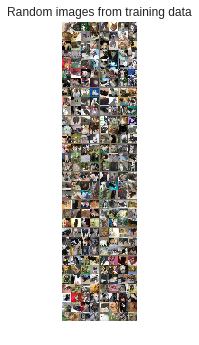

In [0]:
imshow(out, title='Random images from training data')

In [0]:
# class VGG(nn.Module):
    
#     def __init__(self): # __init__ is constructor 
#         super(VGG, self).__init__()
        
#         self.layer1 = nn.Sequential(
#             nn.Conv2d(in_channels=3, out_channels=64, kernel_size=(3, 3),
#             stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(2, stride=2)
#         )

#         self.layer2 = nn.Sequential(
#             nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3),
#             stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(2, stride=2)
#         )
        
#         self.layer3 = nn.Sequential(
#             nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3, 3),
#             stride=1, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3),
#             stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(2, stride=2)
#         )
        
#         self.layer4 = nn.Sequential(
#             nn.Conv2d(in_channels=256, out_channels=512, kernel_size=(3, 3),
#             stride=1, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3),
#             stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(2, stride=2)
#         )
        
#         self.layer5 = nn.Sequential(
#             nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3),
#             stride=1, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3),
#             stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(2, stride=2)
#         )
        
        
#         self.fc = nn.Sequential(
#             nn.Linear(512*7*7, 4096),
#             nn.ReLU(),
#             nn.Linear(4096, 4096),
#             nn.ReLU(),
#             nn.Linear(4096, 1000),
#             nn.ReLU(),
#             nn.Linear(1000, 2),
#             nn.Softmax()
#         )
        
#     def forward(self, x):
#         out = self.layer1(x)
#         out = self.layer2(out)            
#         out = self.layer3(out)
#         out = self.layer4(out)
#         out = self.layer5(out)
#         out = out.view(out.size(0), -1) 
#         out = self.fc(out)
        
#         return out

class SimpleCNN(nn.Module):
    
    def __init__(self): # __init__ is constructor 
        super(SimpleCNN, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 16,  kernel_size=(3, 3),stride=1, padding=1), # 3 = RGB(3channal), 16= 16 filter, padding= reduce the sie 1 column and rows
            nn.ReLU(), # nonlinear AF, - make 0
            nn.MaxPool2d(2, stride=2)
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32,   kernel_size=(3, 3),stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2)
        )
        
        self.conv3 = nn.Sequential(
            nn.Conv2d(32, 64,  kernel_size=(3, 3),stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2)
        )
        
        self.fc =  nn.Sequential(
            nn.Linear(28 * 28 * 64, 500), # fully connected layer, in pytorch we call linear layer, make the all layer to 2 vector (0,1)
            nn.ReLU(),
            nn.Linear(500, 2),
            nn.Softmax()
        )
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)             # (bs, C, H, W)
        out = self.conv3(out)
#         print(out.size())
        out = out.view(out.size(0), -1)  #(bs, C, H, W)
        out = self.fc(out)
        
        return out

In [0]:
cuda_available = torch.cuda.is_available()

In [0]:
#  run
model = SimpleCNN()
model.cuda()
summary(model, (3, 224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 224, 224]             448
              ReLU-2         [-1, 16, 224, 224]               0
         MaxPool2d-3         [-1, 16, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]           4,640
              ReLU-5         [-1, 32, 112, 112]               0
         MaxPool2d-6           [-1, 32, 56, 56]               0
            Conv2d-7           [-1, 64, 56, 56]          18,496
              ReLU-8           [-1, 64, 56, 56]               0
         MaxPool2d-9           [-1, 64, 28, 28]               0
           Linear-10                  [-1, 500]      25,088,500
             ReLU-11                  [-1, 500]               0
           Linear-12                    [-1, 2]           1,002
          Softmax-13                    [-1, 2]               0
Total params: 25,113,086
Trainable para

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [0]:
if cuda_available:
    model = model.cuda()
#Loss function and 
criterion = nn.CrossEntropyLoss() # minimize this 
optimizer = optim.SGD(model.parameters(), lr=0.01) # stochastic gradien, W = W - lr * dW


In [0]:
def to_var(x):
    if torch.cuda.is_available():
        x = x.cuda()
    return Variable(x)

In [0]:
# for epoch in range(10):
#     losses = []
#     # Train
#     for batch_idx, (inputs, targets) in enumerate(train_dl):
#         if cuda_available:
#             inputs, targets = inputs.cuda(), targets.cuda()

#         optimizer.zero_grad()
#         inputs, targets = Variable(inputs), Variable(targets)
#         outputs = model(inputs)
#         loss = criterion(outputs, targets)
#         loss.backward()
#         optimizer.step()
#         losses.append(loss.item())

#     print('Epoch : %d Loss : %.3f ' % (epoch, np.mean(losses)))
    
#     # Evaluate
#     model.eval()
#     total = 0
#     correct = 0
#     for batch_idx, (inputs, targets) in enumerate(test_dl):
#         if cuda_available:
#             inputs, targets = inputs.cuda(), targets.cuda()

#         inputs, targets = Variable(inputs, volatile=True), Variable(targets, volatile=True)
#         outputs = model(inputs)
#         _, predicted = torch.max(outputs.data, 1)
#         total += targets.size(0)
#         correct += predicted.eq(targets.data).cpu().sum()

#     print('Epoch : %d Test Acc : %.3f' % (epoch, 100.*correct/total))
#     print('--------------------------------------------------------------')
#     model.train()

In [0]:
#Train
num_epochs = 50
losses = []
epoch_losses = []
for epoch in range(num_epochs):
    for i, (inputs, targets) in enumerate(train_dl):
        inputs = to_var(inputs)
        targets = to_var(targets)
                
        # forward
        optimizer.zero_grad()
        outputs = model(inputs)
        
        # loss
        loss = criterion(outputs, targets)
        losses += [loss.item()] # draw fig
        
        # loos backward
        loss.backward()
        
        #update params
        optimizer.step()
        
        #report
        print ('Epoch [%2d/%3d], Step [%3d/%3d], Loss: %.4f' 
                   % (epoch + 1, num_epochs, i + 1, len(train_ds) // batch_size, loss.item()))
    epoch_losses.append(np.mean(losses))

torch.Size([256, 64, 28, 28])


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch [ 1/ 50], Step [  1/ 78], Loss: 0.6611
torch.Size([256, 64, 28, 28])
Epoch [ 1/ 50], Step [  2/ 78], Loss: 0.6591
torch.Size([256, 64, 28, 28])
Epoch [ 1/ 50], Step [  3/ 78], Loss: 0.6625
torch.Size([256, 64, 28, 28])
Epoch [ 1/ 50], Step [  4/ 78], Loss: 0.6599
torch.Size([256, 64, 28, 28])
Epoch [ 1/ 50], Step [  5/ 78], Loss: 0.6665
torch.Size([256, 64, 28, 28])
Epoch [ 1/ 50], Step [  6/ 78], Loss: 0.6551
torch.Size([256, 64, 28, 28])
Epoch [ 1/ 50], Step [  7/ 78], Loss: 0.6568
torch.Size([256, 64, 28, 28])
Epoch [ 1/ 50], Step [  8/ 78], Loss: 0.6677
torch.Size([256, 64, 28, 28])
Epoch [ 1/ 50], Step [  9/ 78], Loss: 0.6726
torch.Size([256, 64, 28, 28])
Epoch [ 1/ 50], Step [ 10/ 78], Loss: 0.6481
torch.Size([256, 64, 28, 28])
Epoch [ 1/ 50], Step [ 11/ 78], Loss: 0.6231
torch.Size([256, 64, 28, 28])
Epoch [ 1/ 50], Step [ 12/ 78], Loss: 0.6388
torch.Size([256, 64, 28, 28])
Epoch [ 1/ 50], Step [ 13/ 78], Loss: 0.6526
torch.Size([256, 64, 28, 28])
Epoch [ 1/ 50], Step [ 14

Text(0.5, 1.0, 'Cross Entropy loss')

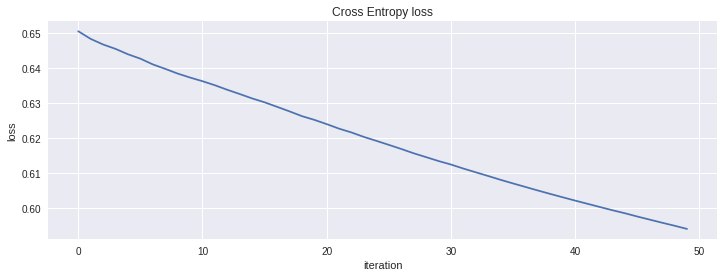

In [0]:
plt.figure(figsize=(12, 4))
plt.plot(epoch_losses)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Cross Entropy loss')

In [0]:
# def evaluate_model(model, DataLoader):
#     model.eval()  # for batch norm layer
correct = 0
total = 0
with torch.no_grad():
    for data in valid_dl:
        images, labels = data
        images = to_var(images)
        labels = to_var(labels)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the valid images: %d %%' % (100 * correct / total))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the valid images: 49 %


In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in train_dl:
        images, labels = data
        images = to_var(images)
        labels = to_var(labels)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the train images: %d %%' % (100 * correct / total))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the train images: 50 %


In [0]:
correct = 0
total = 0
predictions = []
with torch.no_grad():
    for data in test_dl:
        images, labels = data
        images = to_var(images)
        labels = to_var(labels)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.append(predicted)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the test images: 97 %


# Submit the results

In [0]:
def predictCSV(predicts, file_path):
  labels = {0:'Cat', 1:'Dog'}
  with open(file_path,'w',newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(("id","label"))
    for i, label in enumerate(predicts):
#       _, predict = torch.max(predicts[i].data, 0)
#       print(int(predicts[i].data[0]))
      writer.writerow((i+1,labels[int(predicts[i].data[0])]))
#   debug("save predict csv files of model to :{}".format(file_path))

# print(predictions)
predictCSV(predictions,"/drive/My Drive/kaggle.csv")

